In [23]:
import pandas as pd
import numpy as np
import librosa
import librosa.display
from matplotlib.pyplot import specgram
import matplotlib.pyplot as plt
import pickle
import gzip
%matplotlib inline

# Reading dataset

In [2]:
with gzip.open('../cache/dataset.pkl.gz', 'rb') as f:
    X, y = pickle.load(f)

In [4]:
len(X), len(y)

(807, 807)

In [10]:
a = [x for x, y_ in zip(X, y) if y_ == 0]
b = [x for x, y_ in zip(X, y) if y_ == 1]
c = [x for x, y_ in zip(X, y) if y_ == 2]

## Length problem

In [11]:
len(a), len(b), len(c)

(317, 85, 405)

In [27]:
a_lens = [len(x) for x in a]
b_lens = [len(x) for x in b]
c_lens = [len(x) for x in c]

In [28]:
np.mean(a_lens), np.mean(b_lens), np.mean(c_lens)

(6787.350157728707, 4825.623529411765, 135247.37037037036)

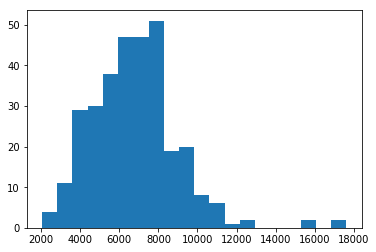

In [31]:
plt.hist(a_lens, bins=20);

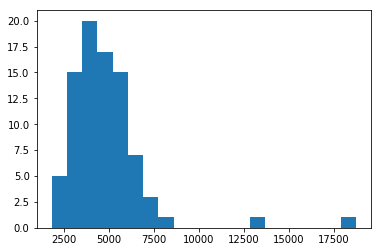

In [32]:
plt.hist(b_lens, bins=20);

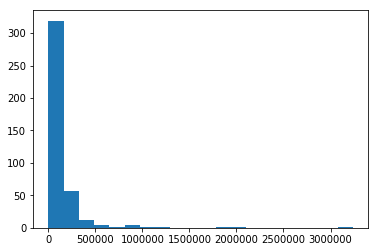

In [33]:
plt.hist(c_lens, bins=20);

## Making "c" class data 

In [35]:
m = np.mean(a_lens + b_lens)
s = np.std(a_lens + b_lens)

In [36]:
m, s

(6372.5572139303486, 2354.9324710581363)

In [72]:
len(c)

405

In [73]:
m - s

4017.6247428722122

In [100]:
c_fixed = []
for d in c:
    i = 0
    while i < len(d) - (m - s):
        next_slice = int(i + np.random.randn() * s + m)
        if next_slice < len(d):
            c_fixed.append(d[i:next_slice])
            i = next_slice
        else:
            break

In [101]:
len(c_fixed)

8394

In [102]:
c_fixed_lens = [len(x) for x in c_fixed]

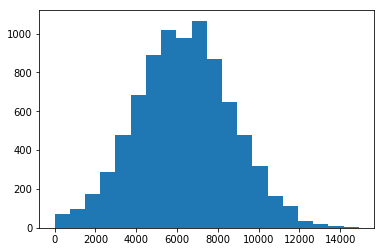

In [103]:
plt.hist(c_fixed_lens, bins=20);

In [104]:
min(c_fixed_lens), max(c_fixed_lens)

(0, 14922)

In [105]:
max(b_lens), min(b_lens)

(18733, 1818)

We need to drop some outliers

In [106]:
c_fixed = [d for d in c_fixed if len(d) > 2000 and len(d) < 18000]

In [107]:
len(c_fixed)

8130

In [39]:
from IPython.display import Audio, display

In [116]:
wid = Audio(c_fixed[11], rate=22050)

In [117]:
display(wid)

# Plots

In [119]:
def plot_waves(sound_names, raw_sounds):
    i = 1
    l = len(raw_sounds)
    
    for n, f in zip(sound_names, raw_sounds):
        fig = plt.figure(figsize=(8, 5))
        librosa.display.waveplot(np.array(f), sr=22050)
        plt.title(n.title())
        i += 1
    plt.show()
    

def plot_specgram(sound_names, raw_sounds):
    i = 1
    l = len(raw_sounds)
    
    for n, f in zip(sound_names, raw_sounds):
        fig = plt.figure(figsize=(8, 5))
        specgram(np.array(f), Fs=22050)
        plt.title(n.title())
        i += 1
    plt.show()

    
def plot_log_power_specgram(sound_names, raw_sounds):
    i = 1
    l = len(raw_sounds)
    
    for n, f in zip(sound_names, raw_sounds):
        fig = plt.figure(figsize=(8, 5))
        D = librosa.logamplitude(np.abs(librosa.stft(f))**2, ref_power=np.max)
        librosa.display.specshow(D, x_axis='time', y_axis='log')
        plt.title(n.title())
        i += 1
    plt.show()

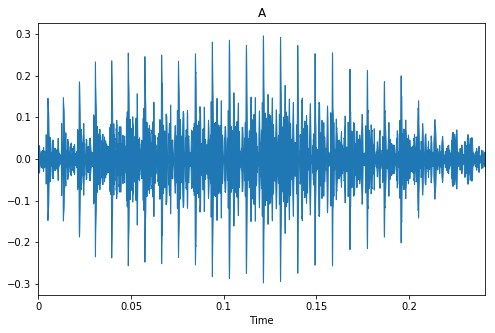

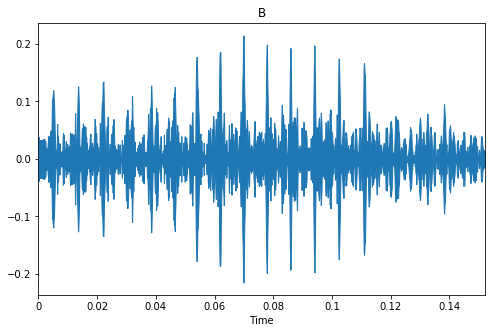

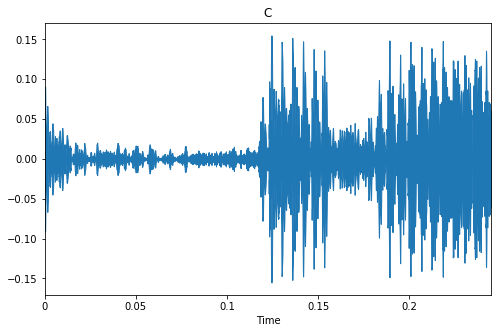

In [120]:
plot_waves(['a', 'b', 'c'], [a[0], b[0], c_fixed[1]])

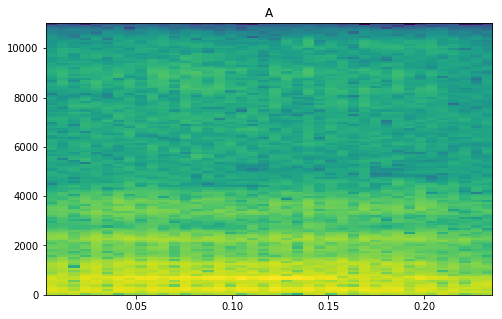

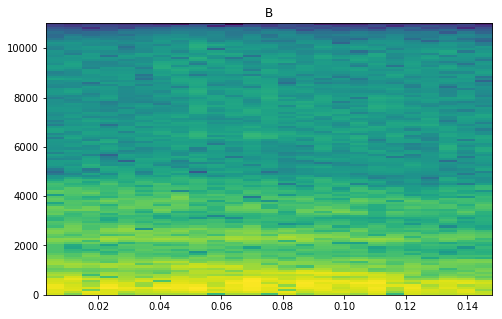

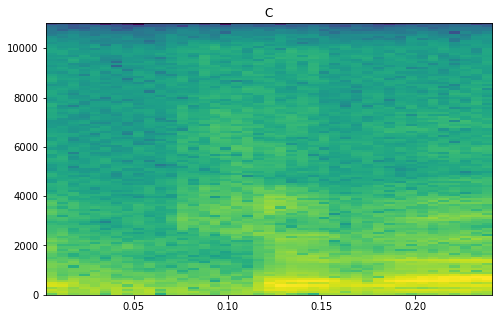

In [121]:
plot_specgram(['a', 'b', 'c'], [a[0], b[0], c_fixed[1]])

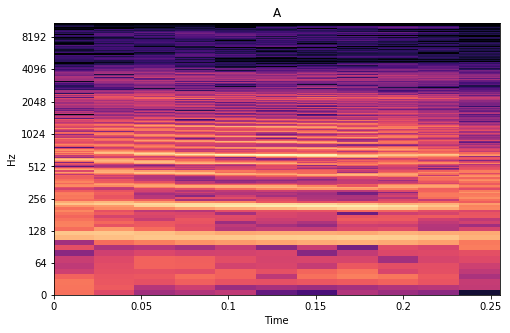

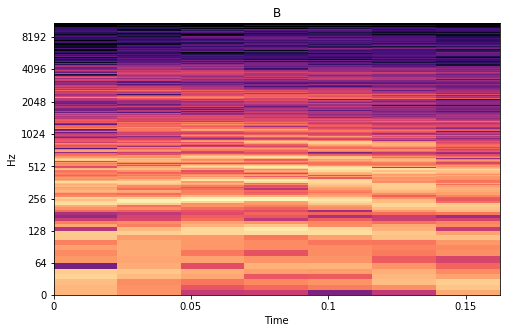

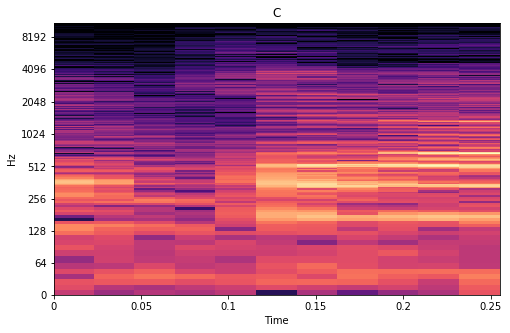

In [122]:
plot_log_power_specgram(['a', 'b', 'c'], [a[0], b[0], c_fixed[1]])

# New dataset

In [123]:
import random

In [133]:
c_ = np.random.choice(c_fixed, len(a) + len(b), False).tolist()

In [134]:
X = a + b + c_
y = [0] * len(a) + [1] * len(b) + [2] * len(c_)

In [136]:
temp = list(zip(X, y))
random.shuffle(temp)
X, y = zip(*temp)

In [137]:
len(X), len(y)

(804, 804)

# Features

In [162]:
len(a[1])

4653

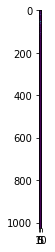

In [163]:
plt.imshow(np.abs(librosa.stft(a[1])))

In [179]:
s = np.abs(librosa.stft(a[1]))

In [180]:
c = np.mean(librosa.feature.chroma_stft(S=s).T,axis=0)


In [182]:
c.shape

(12,)

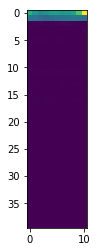

In [147]:
plt.imshow(np.square(librosa.feature.mfcc(a[0], n_mfcc=40)))

In [178]:
np.mean(librosa.feature.mfcc(a[1], n_mfcc=40).T, axis=0)

array([ -3.13439531e+02,   2.05475784e+02,  -2.03092079e+00,
        -9.33408195e+00,  -2.45739738e+01,  -3.27046234e-01,
        -1.05694934e-02,  -1.15510544e+01,  -7.30149137e-01,
        -1.61649807e+00,  -5.63411647e+00,   2.39282071e+01,
         9.47281166e+00,  -5.65343113e+00,  -3.99271484e-01,
         5.32554943e+00,  -1.12654267e+00,  -1.61092868e+00,
        -4.66128900e+00,  -4.72550492e-01,  -2.23403312e+00,
         5.06003863e-01,   9.19985987e+00,   1.02951365e+01,
         5.60181998e+00,   2.02503233e+00,   1.06690499e+00,
         5.21798494e+00,  -7.92908076e-01,  -5.32029483e-01,
         5.91056953e+00,   3.43303336e-01,  -6.41606995e-01,
         8.81224414e-01,   2.87469489e+00,   6.19624833e+00,
         2.29190632e+00,   5.73036767e-01,  -9.65062232e-01,
        -4.65790726e+00])

In [164]:
librosa.feature.chroma_stft(a[1]).shape

(12, 10)

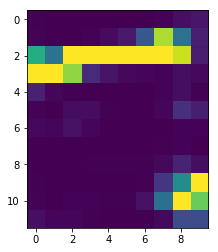

In [165]:
plt.imshow(np.square(librosa.feature.chroma_stft(a[1])))

In [166]:
librosa.feature.melspectrogram(a[1]).shape

(128, 10)

In [167]:
librosa.feature.spectral_contrast(a[1]).shape

(7, 10)

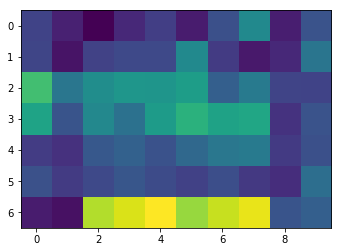

In [168]:
plt.imshow(np.square(librosa.feature.spectral_contrast(a[1])))

In [158]:
librosa.effects.harmonic(a[0]).shape

(5312,)

In [169]:
librosa.feature.tonnetz(librosa.effects.harmonic(a[1])).shape

(6, 10)

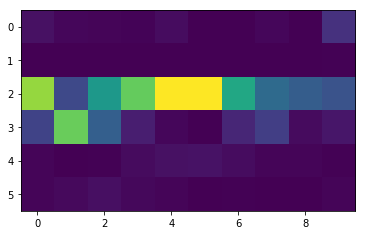

In [170]:
plt.imshow(np.square(librosa.feature.tonnetz(librosa.effects.harmonic(a[1]))))

In [183]:
def extract_feature(x):
    features = {}
    stft = np.abs(librosa.stft(x))
    features['stft_min'] = stft.min()
    features['stft_max'] = stft.max()
    features['stft_mean'] = stft.mean()
    features['stft_std'] = stft.std()
    
    mfccs = np.mean(librosa.feature.mfcc(a[1], n_mfcc=5).T, axis=0)
    features['mfccs_0'] = mfccs[0]
    features['mfccs_1'] = mfccs[1]
    features['mfccs_2'] = mfccs[2]
    features['mfccs_3'] = mfccs[3]
    features['mfccs_4'] = mfccs[4]

    chrome = librosa.feature.chroma_stft(S=stft)
    features['chrome_min'] = chrome.min()
    features['chrome_max'] = chrome.max()
    features['chrome_mean'] = chrome.mean()
    features['chrome_std'] = chrome.std()
    
    mel = librosa.feature.melspectrogram(x)
    features['mel_min'] = mel.min()
    features['mel_max'] = mel.max()
    features['mel_mean'] = mel.mean()
    features['mel_std'] = mel.std()
    
    contrast = librosa.feature.spectral_contrast(x)
    features['contrast_min'] = contrast.min()
    features['contrast_max'] = contrast.max()
    features['contrast_mean'] = contrast.mean()
    features['contrast_std'] = contrast.std()
    
    tonnetz = librosa.feature.tonnetz(y=librosa.effects.harmonic(x))
    features['tonnetz_min'] = tonnetz.min()
    features['tonnetz_max'] = tonnetz.max()
    features['tonnetz_mean'] = tonnetz.mean()
    features['tonnetz_std'] = tonnetz.std()
    return features

In [186]:
X_df = pd.DataFrame([extract_feature(x) for x in X])

/home/evgeny/miniconda3/lib/python3.6/site-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


In [187]:
X_df.shape

(804, 25)

In [189]:
X_df.head()

,chrome_max,chrome_mean,chrome_min,chrome_std,contrast_max,contrast_mean,contrast_min,contrast_std,mel_max,mel_mean,...,mfccs_3,mfccs_4,stft_max,stft_mean,stft_min,stft_std,tonnetz_max,tonnetz_mean,tonnetz_min,tonnetz_std
0,1.0,0.610155,0.109264,0.262566,34.918180,19.735280,7.626328,6.184367,56.289161,0.291715,...,-9.334082,-24.573974,32.647659,0.155337,1.897913e-07,0.959170,0.234140,0.012717,-0.117538,0.063585
1,1.0,0.578791,0.187218,0.231779,31.587158,21.499718,8.912516,5.232662,86.863485,0.704132,...,-9.334082,-24.573974,37.639130,0.343847,6.082330e-06,1.474964,0.262672,0.020597,-0.150905,0.072886
2,1.0,0.537998,0.213948,0.230895,31.338519,18.521522,8.093814,5.451630,70.709109,0.620621,...,-9.334082,-24.573974,33.039059,0.301492,2.925579e-06,1.393008,0.243129,0.049273,-0.069328,0.062470
3,1.0,0.559956,0.224209,0.243329,37.078335,19.868549,12.349374,4.848544,2.108765,0.044518,...,-9.334082,-24.573974,6.570984,0.084429,4.932458e-06,0.370781,0.141035,0.005802,-0.118075,0.052405
4,1.0,0.635412,0.235564,0.204649,32.299109,17.426923,9.103955,5.781987,25.148473,0.280714,...,-9.334082,-24.573974,21.531097,0.210689,6.806327e-06,0.933714,0.124081,0.012946,-0.074278,0.042604


In [190]:
from pandas_profiling import ProfileReport

In [192]:
rep = ProfileReport(X_df)

In [193]:
rep.get_rejected_variables()

['mel_std', 'mfccs_1', 'mfccs_3', 'mfccs_4', 'stft_std']

In [196]:
X_df = X_df[X_df.columns[X_df.columns.isin(set(X_df.columns) -\
                                           set(rep.get_rejected_variables()))]]

## Models 

In [212]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [201]:
model = LGBMClassifier(n_estimators=10)

In [202]:
score = cross_val_score(model, X_df, y)

/home/evgeny/miniconda3/lib/python3.6/site-packages/lightgbm/basic.py:642: UserWarning: max_bin keyword has been found in `params` and will be ignored. Please use max_bin argument of the Dataset constructor to pass this parameter.
  'Please use {0} argument of the Dataset constructor to pass this parameter.'.format(key))
/home/evgeny/miniconda3/lib/python3.6/site-packages/lightgbm/basic.py:648: LGBMDeprecationWarning: The `max_bin` parameter is deprecated and will be removed in 2.0.12 version. Please use `params` to pass this parameter.
  'Please use `params` to pass this parameter.', LGBMDeprecationWarning)
/home/evgeny/miniconda3/lib/python3.6/site-packages/lightgbm/basic.py:642: UserWarning: max_bin keyword has been found in `params` and will be ignored. Please use max_bin argument of the Dataset constructor to pass this parameter.
  'Please use {0} argument of the Dataset constructor to pass this parameter.'.format(key))
/home/evgeny/miniconda3/lib/python3.6/site-packages/lightgbm/

In [203]:
score

array([ 0.74349442,  0.71641791,  0.69662921])

In [208]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.2)

In [209]:
X_train.shape, X_test.shape

((643, 20), (161, 20))

In [210]:
model.fit(X_train, y_train)

/home/evgeny/miniconda3/lib/python3.6/site-packages/lightgbm/basic.py:642: UserWarning: max_bin keyword has been found in `params` and will be ignored. Please use max_bin argument of the Dataset constructor to pass this parameter.
  'Please use {0} argument of the Dataset constructor to pass this parameter.'.format(key))
/home/evgeny/miniconda3/lib/python3.6/site-packages/lightgbm/basic.py:648: LGBMDeprecationWarning: The `max_bin` parameter is deprecated and will be removed in 2.0.12 version. Please use `params` to pass this parameter.
  'Please use `params` to pass this parameter.', LGBMDeprecationWarning)


LGBMClassifier(boosting_type='gbdt', colsample_bytree=1.0, learning_rate=0.1,
        max_bin=255, max_depth=-1, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=10,
        n_jobs=-1, num_leaves=31, objective=None, random_state=None,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=1)

In [211]:
pr = model.predict(X_test)

In [213]:
accuracy_score(y_test, pr)

0.75776397515527949

In [214]:
cm = confusion_matrix(y_test, pr)

In [215]:
cm

array([[46,  9,  7],
       [ 4,  7,  4],
       [15,  0, 69]])

In [219]:
sorted(zip(X_df.columns, model.feature_importance()), key=lambda x: -x[1])

/home/evgeny/miniconda3/lib/python3.6/site-packages/lightgbm/sklearn.py:588: LGBMDeprecationWarning: The `feature_importance()` method is deprecated and will be removed in 2.0.12 version. Please use attribute `feature_importances_` instead.
  'Please use attribute `feature_importances_` instead.', LGBMDeprecationWarning)


[('mel_mean', 75),
 ('chrome_mean', 70),
 ('tonnetz_std', 63),
 ('chrome_std', 59),
 ('contrast_mean', 58),
 ('stft_mean', 50),
 ('contrast_max', 46),
 ('contrast_min', 42),
 ('mel_max', 42),
 ('stft_max', 37),
 ('tonnetz_max', 34),
 ('chrome_min', 30),
 ('tonnetz_mean', 29),
 ('contrast_std', 26),
 ('mel_min', 22),
 ('stft_min', 18),
 ('tonnetz_min', 18),
 ('chrome_max', 0),
 ('mfccs_0', 0),
 ('mfccs_2', 0)]

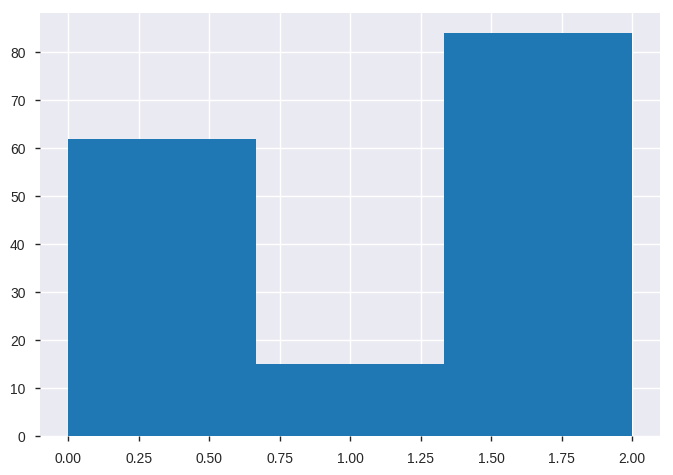

In [224]:
plt.hist(y_test, bins=3);

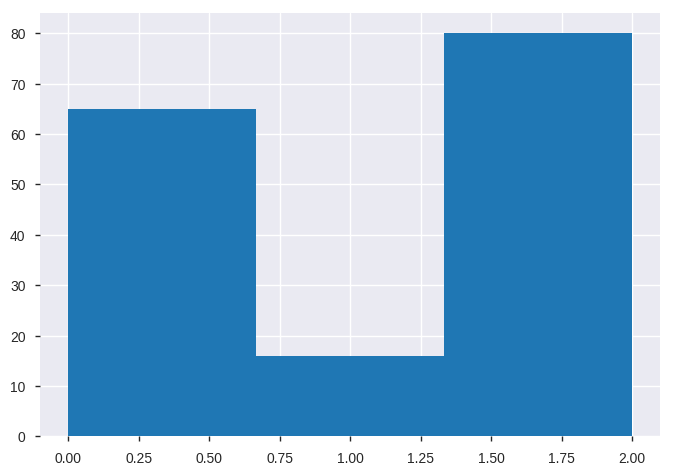

In [225]:
plt.hist(pr, bins=3);

In [226]:
accuracy_score(y_test, [2] * len(y_test))

0.52173913043478259